Matplotlib is building the font cache; this may take a moment.


Net(
  (fc1): Linear(in_features=1, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
  (sig): Sigmoid()
)
[Parameter containing:
tensor([[-0.2395],
        [-0.3257],
        [ 0.5493],
        [-0.9170],
        [-0.1208]], requires_grad=True), Parameter containing:
tensor([-0.5725,  0.9158,  0.0027,  0.5293,  0.8480], requires_grad=True), Parameter containing:
tensor([[-0.3916, -0.4037,  0.1938, -0.2312, -0.3087],
        [-0.1668, -0.4069, -0.0441,  0.2011, -0.2750],
        [ 0.3093, -0.3795,  0.2304,  0.3462,  0.1058],
        [-0.1492,  0.0551, -0.0037, -0.3276, -0.2905],
        [-0.4196,  0.2932, -0.2742, -0.1321,  0.0186],
        [ 0.0284,  0.1609,  0.3924,  0.3889, -0.2138],
        [ 0.1965, -0.2036, -0.3546,  0.1488, -0.1440],
        [ 0.2364,  0.2139, -0.3853, -0.0748,  0.0101],
        [-0.2587, -0.0711, -0.4230,  0.2940, -0.3864],
        [ 0.0561,  0.2181,  0.4114, -0.3143,

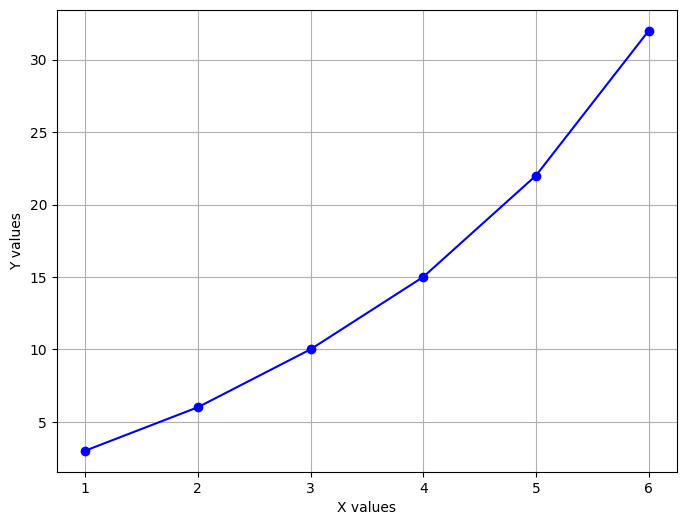

In [2]:
### Training with fancier version ###

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module): ## nn.Module class is used
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,5,bias=True)  # in dim, out dim
        self.fc2 = nn.Linear(5,10,bias=True)
        self.fc3 = nn.Linear(10,1,bias=True)
        self.sig = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.sig(x)
        x = self.fc2(x)
        x = self.sig(x)
        x = self.fc3(x)
        
        return x

net = Net()

print(net)
print(list(net.parameters())) # parameters are randomized


#def criterion(out, label):
#    return (label - out)**2
criterion = nn.MSELoss()


optimizer = optim.SGD(net.parameters(), lr=0.003, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.1)


data = [(1.0,3.0), (2.0,6.0), (3.0,10.0), (4.0,15.0), (5.0,22.0), (6.0,32.0)]

# Split data into x and y
x_values, y_values = zip(*data)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.show()

In [3]:
num_epochs = 5000
for epoch in range(num_epochs): # 0 - 19
    for i, current_data in enumerate(data):
        X, Y = current_data
        X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])
        optimizer.zero_grad()   
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()    ## This line is equivalent to "W = W - lr* W.grad"
    if epoch <= 10 or epoch >= (num_epochs - 10):
        print("Epoch {} - loss: {}".format(epoch, loss))


### Test the trained network ###            
for i, current_data in enumerate(data):
    X, Y = current_data
    X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])  
    out = net(torch.FloatTensor(X))  
    print("when x = {}, y = {}".format(X, out))

Epoch 0 - loss: 952.681396484375
Epoch 1 - loss: 761.1317138671875
Epoch 2 - loss: 599.7228393554688
Epoch 3 - loss: 478.71759033203125
Epoch 4 - loss: 400.3833923339844
Epoch 5 - loss: 354.8142395019531
Epoch 6 - loss: 329.4869384765625
Epoch 7 - loss: 315.1716613769531
Epoch 8 - loss: 306.3018798828125
Epoch 9 - loss: 299.74365234375
Epoch 10 - loss: 293.8321533203125
Epoch 4990 - loss: 2.3470784071832895e-07
Epoch 4991 - loss: 2.3470784071832895e-07
Epoch 4992 - loss: 2.3470784071832895e-07
Epoch 4993 - loss: 2.3470784071832895e-07
Epoch 4994 - loss: 2.3470784071832895e-07
Epoch 4995 - loss: 2.3470784071832895e-07
Epoch 4996 - loss: 2.3470784071832895e-07
Epoch 4997 - loss: 2.3470784071832895e-07
Epoch 4998 - loss: 2.3470784071832895e-07
Epoch 4999 - loss: 2.3470784071832895e-07
when x = tensor([1.]), y = tensor([2.9999], grad_fn=<ViewBackward0>)
when x = tensor([2.]), y = tensor([5.9998], grad_fn=<ViewBackward0>)
when x = tensor([3.]), y = tensor([9.9995], grad_fn=<ViewBackward0>)
